In [50]:
import re
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score,roc_curve, auc
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

# Modelling

### 1. RandomForest

Формирую датасет для обучения и делю его на train и test

In [45]:
df_prep = pd.read_csv('final_prepared.csv')

In [56]:
df_forest = df_prep.copy()
df_forest = df_forest.drop(['id'], axis=1)

x = df_forest.drop(['Летальность'], axis=1)
y = df_forest['Летальность']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

Обучаю модель RandomForest

In [57]:
rf_clf = RandomForestClassifier(
    n_estimators=150, 
    min_samples_split=3, 
    bootstrap=False, 
    random_state=42, 
    max_depth=80,
    class_weight='balanced'
)

rf_clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=80,
                       min_samples_split=3, n_estimators=150, random_state=42)

In [58]:
predicted_train_rf = rf_clf.predict(x_train)
predicted_test_rf = rf_clf.predict(x_test)

print(accuracy_score(y_train, predicted_train_rf))
print(accuracy_score(y_test, predicted_test_rf))

1.0
0.8195488721804511


In [59]:
roc_auc_score(y_test, rf_clf.predict_proba(x_test)[:, 1])

0.8585858585858585

In [ ]:
f_imp_list = list(zip(x_train.columns, rf_clf.feature_importances_))
f_imp_list.sort(key=lambda x: x[1], reverse=True)
f_imp_list

[('Креатинин_std', 0.072220564296784),
 ('Мочевина_std', 0.07137184240210277),
 ('АД ср_std', 0.06623769404300787),
 ('ЧД_std', 0.052516117105873394),
 ('Возраст_std', 0.048247984874485),
 ('Амилаза крови_std', 0.04708696198945089),
 ('П/я_std', 0.04699790110944495),
 ('Глюкоза крови_std', 0.04267214342442663),
 ('пульс_std', 0.037460133110342284),
 ('АСТ_std', 0.03714276206310611),
 ('Общ белок (г/л)_std', 0.03699300015360841),
 ('температура_std', 0.03679749481682593),
 ('Гематокрит_std', 0.03668680474055266),
 ('Лимфоциты_std', 0.03596945517052271),
 ('Натрий_std', 0.035822055026782665),
 ('Лейкоциты_std', 0.03398471407876162),
 ('Калий_std', 0.03276000561732023),
 ('Билирубин общ_std', 0.03111466044561584),
 ('АЛТ_std', 0.029142096875087),
 ('Диастаза мочи_std', 0.0282634510309184),
 ('Сутки н/з_std', 0.02650131218738944),
 ('Юные_std', 0.016427268575547122),
 ('познее питание_нет', 0.013050704072654557),
 ('познее питание_да', 0.011763553842104861),
 ('ШКГ_15.0', 0.008219763630538

Кросс-валидация

In [ ]:
cross_validate(rf_clf, x, y, cv=5)

{'fit_time': array([1.38957119, 0.76693749, 1.05893421, 0.73922801, 0.66810989]),
 'score_time': array([0.03819132, 0.1967957 , 0.02852488, 0.04962516, 0.06952643]),
 'test_score': array([0.30075188, 0.72932331, 0.7518797 , 0.7593985 , 0.8030303 ])}

In [9]:
cv_score = cross_val_score(rf_clf, x, y, cv=3)

In [10]:
print(cv_score.mean())
print(cv_score.std())

0.7801149565855447
0.002594252590876402


### 2. LogisticRegression

Формирую датасет для обучения и делю его на train и test

In [46]:
logreg_df = df_prep.copy()
x = logreg_df.drop(['Летальность', 'id'], axis=1)
y = logreg_df['Летальность']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Обучаю модель логистической регрессии

In [47]:
lr = LogisticRegression(
    C=3,
    max_iter=400,
    random_state=42,
    class_weight='balanced'
    )
lr.fit(x_train, y_train)

LogisticRegression(C=3, class_weight='balanced', max_iter=400, random_state=42)

In [48]:
roc_auc_score(y_test, lr.predict_proba(x_test)[:, 1])

0.8657159833630422

LogisticRegression: ROC AUC=0.866


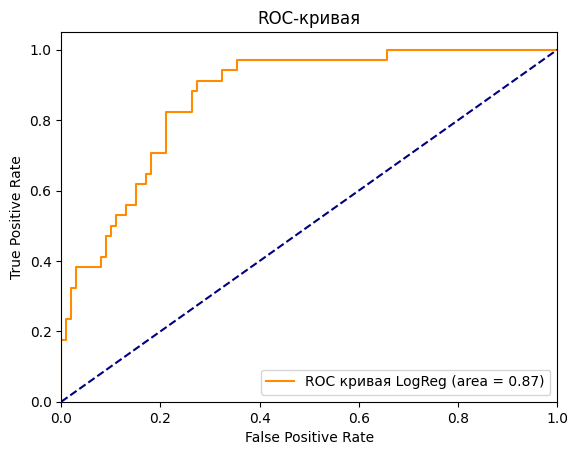

In [60]:
plt.figure(0).clf ()
lr_probs = lr.predict_proba(x_test)
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(y_test, lr_probs)
print('LogisticRegression: ROC AUC=%.3f' % (lr_auc))

fpr, tpr, treshold = roc_curve(y_test, lr_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая LogReg (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

In [32]:
lr_imp_list = list(zip(lr.coef_[0], lr.feature_names_in_))
lr_imp_list.sort(key=lambda x: x[0], reverse=True)
lr_imp_list
# lr.feature_names_in_

[(0.9998582250018635, 'ШКГ_12.0'),
 (0.7608719771770612, 'антибиотик_Фтрохинолоны'),
 (0.6425024111313375, 'антибиотик_цефазолин'),
 (0.612649513474747, 'ШКГ_13.0'),
 (0.557750411265243, 'познее питание_нет'),
 (0.3891441385442682, 'ШКГ_15.0'),
 (0.3495964294934282, 'АД ср_std'),
 (0.31071756252944016, 'Гематокрит_std'),
 (0.26309064245003017, 'температура_std'),
 (0.2159860063861983, 'антибиотик_пенициллин'),
 (0.1318893435596683, 'Лимфоциты_std'),
 (0.10660078346922752, 'ШКГ_14.0'),
 (0.062180428388066214, 'Натрий_std'),
 (0.05598078750574634, 'Пол_женский'),
 (0.050266694515358916, 'квамател_нет'),
 (0.049580403567043706, 'АЛТ_std'),
 (0.04122053629884277, 'антибиотик_ЦС-3'),
 (0.03669917228138185, 'октреотид_да'),
 (0.020562481866692902, 'Общ белок (г/л)_std'),
 (0.020164850704381027, 'раннее питание_да'),
 (-0.00032489115787936475, 'ШКГ_8.0'),
 (-0.020346043351830934, 'раннее питание_нет'),
 (-0.02994058284727245, 'Диастаза мочи_std'),
 (-0.03688036492883135, 'октреотид_нет'),
 (-

In [33]:
lr.coef_

array([[ 5.59807875e-02, -5.61619802e-02,  3.66991723e-02,
        -3.68803649e-02, -5.04478872e-02,  5.02666945e-02,
        -4.77129682e-01,  7.60871977e-01,  4.12205363e-02,
        -3.65453668e-01, -8.18178774e-01,  2.15986006e-01,
         6.42502411e-01, -5.57931604e-01,  5.57750411e-01,
         2.01648507e-02, -2.03460434e-02, -3.24891158e-04,
        -2.10810896e+00,  9.99858225e-01,  6.12649513e-01,
         1.06600783e-01,  3.89144139e-01, -1.31560744e-01,
        -5.98069432e-01,  2.63090642e-01, -3.17582408e-01,
         3.49596429e-01, -5.92732046e-01,  3.10717563e-01,
        -3.00290812e-01, -8.43370663e-02, -2.25403667e-01,
         1.31889344e-01,  2.05624819e-02, -5.36401079e-02,
        -2.29965446e-01,  4.95804036e-02, -1.10982977e-01,
        -1.19301056e+00, -9.27001755e-02,  6.21804284e-02,
        -8.12986743e-02, -2.99405828e-02, -1.73239452e-01]])

In [34]:
lr.score(x, y)

0.7650602409638554

In [35]:
logreg_pred_train = lr.predict(x_train)
print('accuracy train', accuracy_score(y_train, logreg_pred_train))

logreg_pred_test = lr.predict(x_test)
print('accuracy test' ,accuracy_score(y_test, logreg_pred_test))
print('confusion_matrix', confusion_matrix(y_test, logreg_pred_test))

accuracy train 0.7629310344827587
accuracy test 0.77
confusion_matrix [[ 46  14]
 [ 32 108]]


In [36]:
cv_score = cross_val_score(lr, x, y, cv=5)
print(cv_score.mean())
print(cv_score.std())

0.631203007518797
0.1736191005127717


LogisticRegression: ROC AUC=0.866
LogisticRegression: ROC AUC=0.859


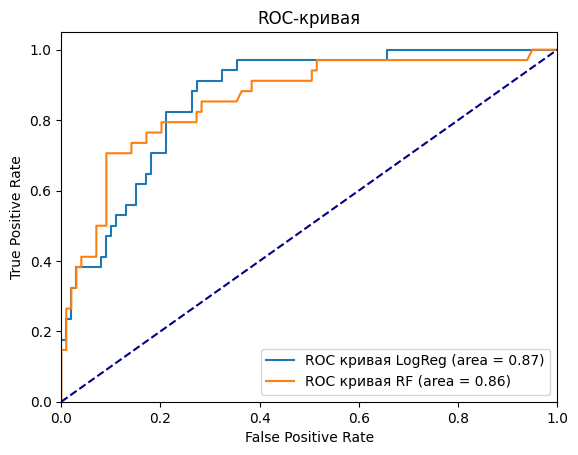

In [62]:
plt.figure(0).clf ()
lr_probs = lr.predict_proba(x_test)
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(y_test, lr_probs)
print('LogisticRegression: ROC AUC=%.3f' % (lr_auc))
fpr, tpr, treshold = roc_curve(y_test, lr_probs)
roc_auc = auc(fpr, tpr)
plt.plot (fpr,tpr,label='ROC кривая LogReg (area = %0.2f)' % roc_auc)

rf_probs = rf_clf.predict_proba(x_test)
rf_probs = rf_probs[:, 1]
rf_auc = roc_auc_score(y_test, rf_probs)
print('LogisticRegression: ROC AUC=%.3f' % (rf_auc))
fpr, tpr, treshold = roc_curve(y_test, rf_probs)
roc_auc = auc(fpr, tpr)
plt.plot (fpr,tpr,label='ROC кривая RF (area = %0.2f)' % roc_auc)
# plt.plot(fpr, tpr, color='darkorange',
#          label='ROC кривая LogReg (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend()
plt.show()

### 3. Многослойный персептрон

Формирую датасет для обучения и делю его на train и test

In [19]:
mlp_df = df_prep.copy()
x = mlp_df.drop(['Летальность', 'id'], axis=1)
y = mlp_df['Летальность']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [20]:
mlp = MLPClassifier(
    random_state=42, 
    max_iter=500, 
    hidden_layer_sizes=(100,40),
    )
mlp.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 40), max_iter=500, random_state=42)

In [23]:
mlp_pred_train = mlp.predict(x_train)
print('accuracy train' ,accuracy_score(y_train, mlp_pred_train))

mlp_pred_test = mlp.predict(x_test)
print('accuracy test' ,accuracy_score(y_test, mlp_pred_test))

accuracy train 1.0
accuracy test 0.765


In [22]:
cv_score = cross_val_score(mlp, x, y, cv=5)
print(cv_score.mean())
print(cv_score.std())

0.6462519936204147
0.15565087632369018


# Results

Обучение модели на всем датасете

In [ ]:
df_forest = df_prep.copy()
df_forest = df_forest.drop(['id'], axis=1)

x = df_forest.drop(['Летальность'], axis=1)
y = df_forest['Летальность']

In [ ]:
rf_clf = RandomForestClassifier(
    n_estimators=150, 
    min_samples_split=3, 
    bootstrap=False, 
    random_state=42, 
    max_depth=80,
)

rf_clf.fit(x, y)

RandomForestClassifier(bootstrap=False, max_depth=80, min_samples_split=3,
                       n_estimators=150, random_state=42)

Сохраняю полученню модель

In [ ]:
with open('model.pickle', 'wb') as file:
    pickle.dump(rf_clf, file)